# POLYNOMIAL REGRESSION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv(r'X:\BIA\Lectures\Housing.csv')

# Coefficient Model

In [17]:
coefficients= model.coef_
intercept= model.intercept_

print("Coefficients (slopes)P:")
for feature, coef in zip (area_sq.columns, coefficients):
    print(f"{feature}: {coef}")
    
print(f"intercept: {intercept}")

Coefficients (slopes)P:
area: [  0.         851.45968388]
intercept: [2512254.26395934]


In [1]:
# With the help of  Coefficients, we can predict the price of the house as well.
# Like if the area = 5000
# Then price= area x 851.459

In [12]:
# For polynomial regression, we need to take sqaure of the features to get curve line.
df['area']= df['area'] ** 2
area_sq= df[['area']]
price= df[['price']]

In [5]:
area_sq_train, area_sq_test, price_train, price_test= train_test_split(area_sq, price, test_size= 0.2 , random_state=42)

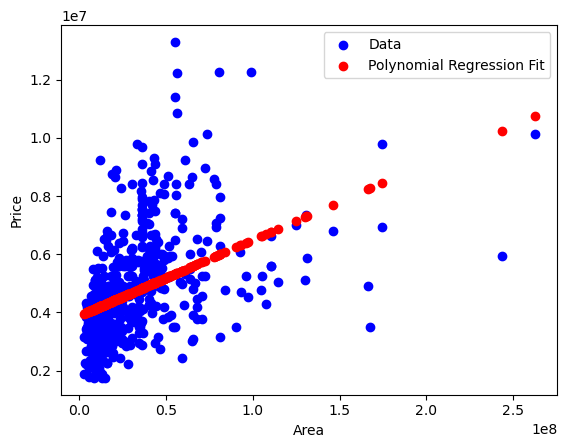

In [10]:
#  Applying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
degree = 1 # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(area_sq_train)
X_test_poly = poly_features.transform(area_sq_test)

# Linear regression model to fit the transformed features
model = LinearRegression()
model.fit(X_train_poly, price_train)

# Predicting and evaluating the model
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


# Plotting
plt.scatter(area_sq, price, color='blue', label='Data')
plt.scatter(area_sq_train, y_train_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()



In [11]:
from sklearn import metrics
# Model evaluation
mae= metrics.mean_absolute_error(price_test, y_test_pred)
mse = metrics.mean_squared_error(price_test, y_test_pred)
rmse= np.sqrt(mse)
r2 = metrics.r2_score(price_test, y_test_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1547934.0502440664
Mean Squared Error: 4008365900805.001
Root Mean Square Error: 2002090.3827762124
R-squared: 0.20698185890446397


#### This shows that our model is not good.